**PA2 Random forests**

**Task 1: Working with a dataset with categorical features**

In [58]:
import pandas as pd 
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from plotnine import *

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

*Step 1. Reading the data*

In [60]:
adultTrainData = pd.read_csv('adult_train.csv', sep=',')
adultTestData = pd.read_csv('adult_test.csv', sep=',')

In [61]:
traindata_shuffled = adultTrainData.sample(frac=1.0, random_state=0)
X_train = traindata_shuffled.drop('target', axis=1)
y_train = traindata_shuffled['target']

In [62]:
testdata_shuffled = adultTestData.sample(frac=1.0, random_state=0)
X_test = testdata_shuffled.drop('target', axis=1)
y_test = testdata_shuffled['target']

*Step 2: Encoding the features as numbers.*

In [63]:
dicts_X_train = X_train.to_dict('records')
dv = DictVectorizer()
X_train_encoded = dv.fit_transform(dicts_X_train)

In [64]:
dicts_X_train[101]

{'age': 37,
 'workclass': 'Private',
 'education': 'Some-college',
 'education-num': 10,
 'marital-status': 'Divorced',
 'occupation': 'Other-service',
 'relationship': 'Not-in-family',
 'race': 'White',
 'sex': 'Male',
 'capital-gain': 0,
 'capital-loss': 0,
 'hours-per-week': 47,
 'native-country': 'United-States'}

In [65]:
dicts_X_test = X_test.to_dict('records')
X_test_encoded = dv.transform(dicts_X_test)

*Step 3. Combining the steps.*

In [66]:
pipeline = make_pipeline(
  DictVectorizer(),
  DecisionTreeClassifier()
)
pipeline.fit(dicts_X_train, y_train)
print(f'train score:{pipeline.score(dicts_X_train, y_train)}')
print(f'test score:{pipeline.score(dicts_X_test, y_test)}')

train score:0.976413500813857
test score:0.8179473005343653


**Task 2: Decision trees and random forests**

*Underfitting and overfitting in decision tree classifiers.*

In [67]:
error_train = []
error_test = []

for i in range(1, 20):
  clf = DecisionTreeClassifier(max_depth = i)
  clf.fit(X_train_encoded, y_train)
  error_train.append(1 - clf.score(X_train_encoded, y_train))
  error_test.append(1 - clf.score(X_test_encoded, y_test))


d:\anaconda3\lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\lib\site-packages\mizani\scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


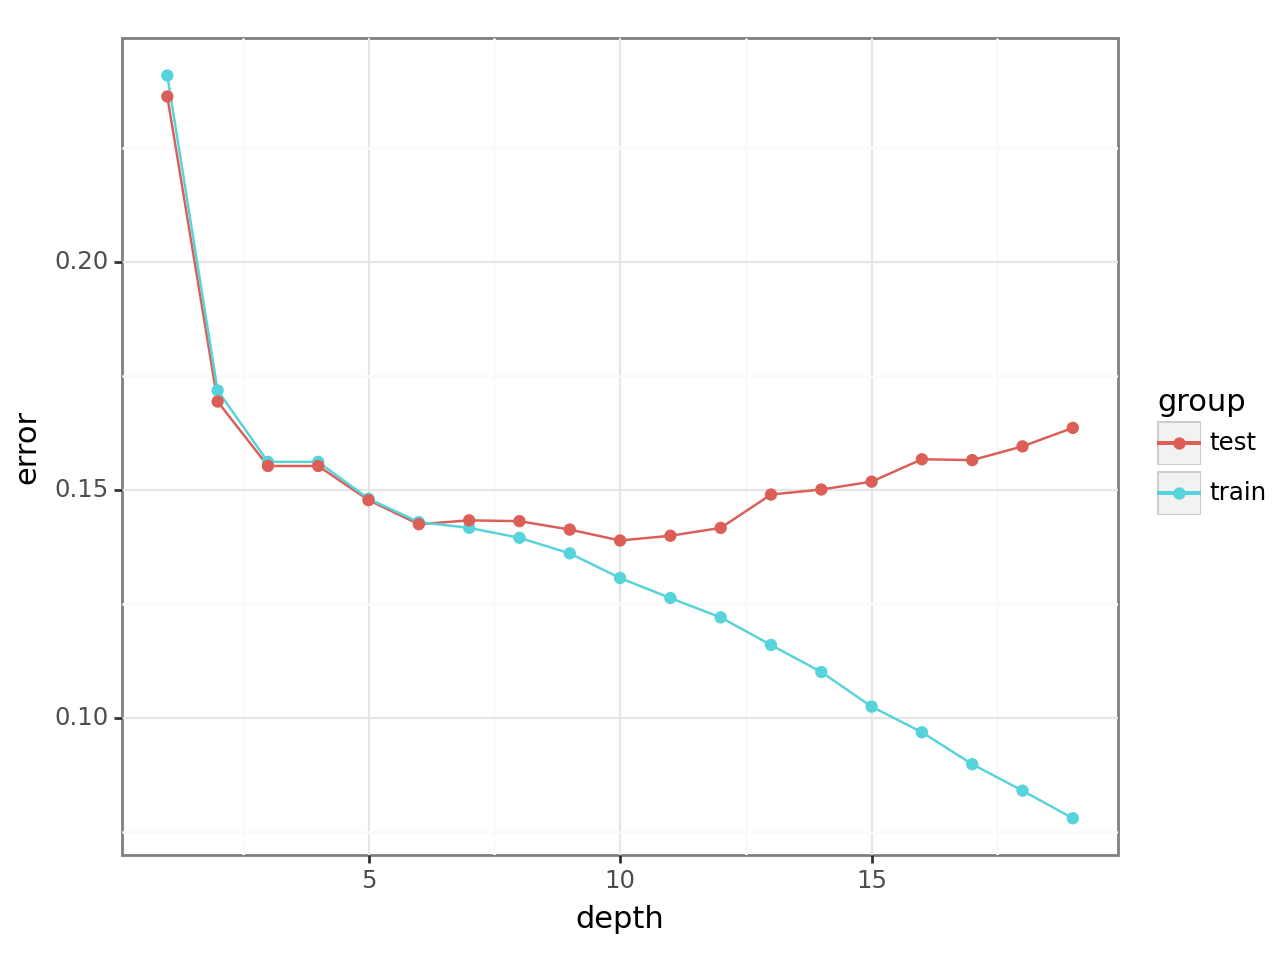

<Figure Size: (640 x 480)>

In [68]:
depth = range(1, 20)
df1 = pd.DataFrame({'group':'train', 'depth': depth, 'error': error_train})
df2 = pd.DataFrame({'group':'test', 'depth': depth, 'error': error_test})
df_train = pd.concat([df1, df2])

p1 = (ggplot(df_train, aes(x = 'depth', y = 'error', color = 'group'))
      + geom_line()
      + geom_point()
      + theme_minimal()
      + theme_bw()
      )
p1

*Underfitting and overfitting in random forest classifiers.*

In [80]:
error_trainForest = []
error_testForest = []
n_estimator = []
times = []
it_times = 40

for j in [1, 10, 20, 50, 100, 150]:
  n_estimator.append([j] * it_times)
  for i in range(1, it_times+1):
    clf = RandomForestClassifier(n_estimators = j, max_depth = i, n_jobs=-1)
    start_time = time.time()
    clf.fit(X_train_encoded, y_train)
    end_time = time.time()
    times.append(end_time - start_time)
    error_trainForest.append(1 - clf.score(X_train_encoded, y_train))
    error_testForest.append(1 - clf.score(X_test_encoded, y_test))
  print(n_estimator[len(n_estimator) - 1])


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
[150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,

*Prepare for the visualization:*

In [81]:
category = []
for i in n_estimator:
  for j in i:
    category.append(j)
len(category)
original_list = list(range(1, it_times+1))
repeated_list = original_list * 6

In [72]:
# original_list = list(range(1, it_times+1))
# repeated_list = original_list * 6
# # print(repeated_list) 

d:\anaconda3\lib\site-packages\mizani\scale.py:210: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
d:\anaconda3\lib\site-packages\mizani\scale.py:223: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


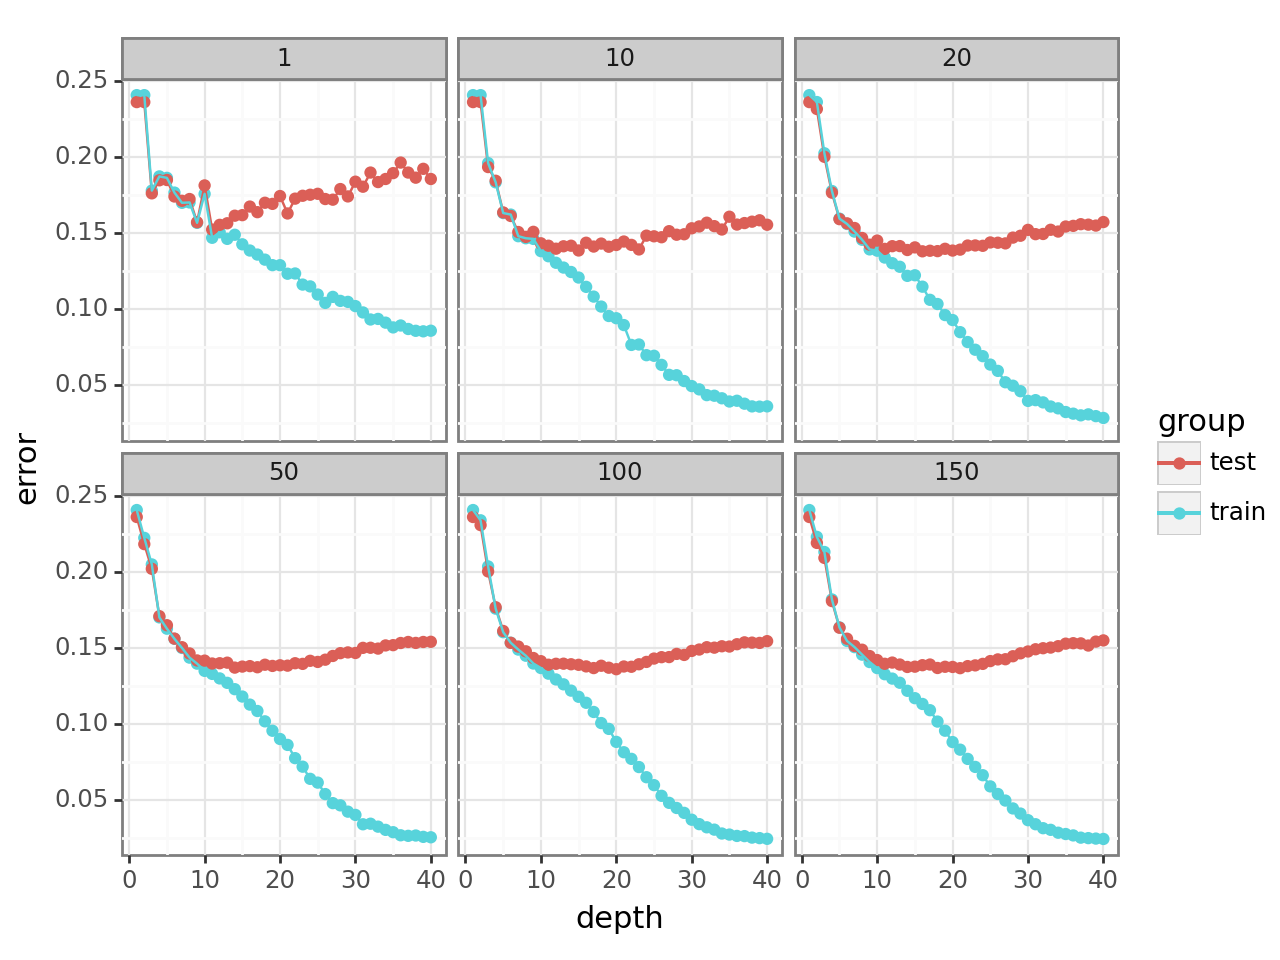

<Figure Size: (640 x 480)>

In [82]:
df1 = pd.DataFrame({'group':'train', 'depth': repeated_list, 'error': error_trainForest, 'number of trees': category, 'time':times})
df2 = pd.DataFrame({'group':'test', 'depth': repeated_list, 'error': error_testForest, 'number of trees': category, 'time':times})
df_full = pd.concat([df1, df2])

p2 = (ggplot(df_full, aes(x = 'depth', y = 'error', color = 'group'))
      + geom_point()
      + geom_line()      
      + facet_wrap('number of trees')
      + theme_minimal()
      + theme_bw()
      )
p2

*As for time*

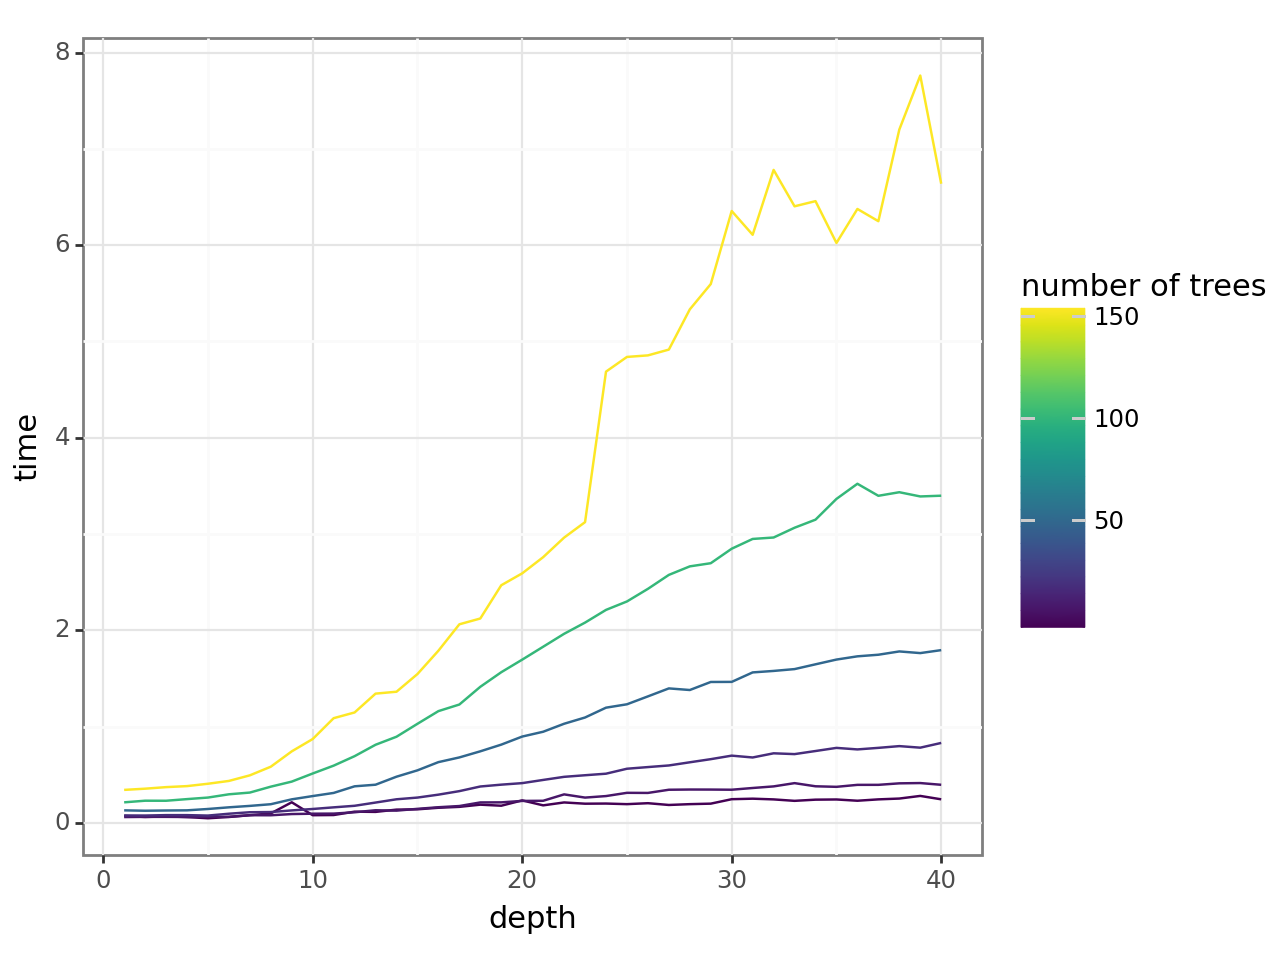

<Figure Size: (640 x 480)>

In [83]:
p3 = (ggplot(df_full, aes(x = 'depth', y = 'time', group = 'number of trees', color = 'number of trees'))
      + geom_line()      
      # + facet_wrap('number of trees')
      + theme_minimal()
      + theme_bw()
      )
p3

*Theveral questions to cover:*  

*1 What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?*  
  
*As we see in the top left of the plot for random forest, Random forest with an ensemble size of 1 has a more unsmooth curve and higher error rate compared to a single tree. This is because random forest does not learn from the entire training data, and it randomly samples features and selects a subset at each split. When the tree depth is shallow, these two factors may lead to greater randomness. As it does not fully absorb the information from the data, that's why its accuracy is also lower than that of a single tree. The significance of random forest lies in reducing the variance (more rigid) by increasing the number of trees and then averaging them. This averaging effect does not work when the size is only 1.*  
  

*2.What happens with the curve for random forests as the ensemble size grows?*  
*3.What happens with the best observed test set accuracy as the ensemble size grows?*  
  
*As the ensemble size grows for random forests, the curve becomes smoother, and the y-value/error rate decreases, the minimum(min error rate/max accuracy) also decrease/increase accordingly. However, when the size reaches some level, the curve no longer undergoes significant changes.*  


*4.What happens with the training time as the ensemble size grows?*
  
*As the ensemble size grows, the training time also increases. This is because we train more decision tree algorithms based on different subsets of the training data.*


**Task 3: Feature importances in random forest classifiers**

*First, let's find the best random forest classifier (based on error rate of the clf on test data) and then start from there.*

In [84]:
df_test = df_full.loc[df_full['group'] == 'test']
min_error_row = df_test.loc[df_test['error'].idxmin()]

print(min_error_row)

group                  test
depth                    20
error              0.135925
number of trees         100
time                1.69684
Name: 179, dtype: object


*Set the depth and number of trees accordingly.*

In [85]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 20, n_jobs=-1)
clf.fit(X_train_encoded, y_train)
important_features = clf.feature_importances_
len(important_features)

107

In [86]:
important_features

array([1.18594942e-01, 1.39181199e-01, 4.23383755e-02, 9.75724449e-02,
       1.66232937e-03, 2.73366835e-03, 6.29064678e-04, 2.15274972e-04,
       8.36595433e-04, 2.73663337e-03, 1.64552180e-03, 2.11480623e-03,
       2.70492662e-03, 1.58348761e-02, 5.92223928e-03, 9.22135054e-03,
       9.83995611e-03, 4.95894329e-05, 6.06931062e-03, 6.16116631e-03,
       7.26254581e-02, 8.49795303e-03, 5.11888435e-04, 1.00508153e-01,
       1.18248531e-03, 3.19387712e-02, 2.06511231e-03, 1.91064695e-03,
       2.45215239e-03, 3.47811209e-04, 1.01825601e-03, 4.79574664e-04,
       1.86020431e-04, 7.14570651e-04, 1.65328818e-04, 1.72464958e-04,
       1.57135002e-04, 9.47998045e-04, 3.77384444e-04, 1.09073535e-03,
       3.82706812e-04, 1.09041453e-04, 1.67521083e-04, 2.12366461e-07,
       1.09384747e-05, 1.75690504e-04, 1.22308467e-04, 8.70941063e-04,
       4.62933018e-04, 2.34635762e-04, 7.14172258e-04, 4.28480518e-04,
       6.09048984e-04, 7.00107556e-05, 2.37611640e-03, 1.02941415e-04,
      

In [87]:
dv.feature_names_

['age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'education=10th',
 'education=11th',
 'education=12th',
 'education=1st-4th',
 'education=5th-6th',
 'education=7th-8th',
 'education=9th',
 'education=Assoc-acdm',
 'education=Assoc-voc',
 'education=Bachelors',
 'education=Doctorate',
 'education=HS-grad',
 'education=Masters',
 'education=Preschool',
 'education=Prof-school',
 'education=Some-college',
 'hours-per-week',
 'marital-status=Divorced',
 'marital-status=Married-AF-spouse',
 'marital-status=Married-civ-spouse',
 'marital-status=Married-spouse-absent',
 'marital-status=Never-married',
 'marital-status=Separated',
 'marital-status=Widowed',
 'native-country=?',
 'native-country=Cambodia',
 'native-country=Canada',
 'native-country=China',
 'native-country=Columbia',
 'native-country=Cuba',
 'native-country=Dominican-Republic',
 'native-country=Ecuador',
 'native-country=El-Salvador',
 'native-country=England',
 'native-country=France',
 'native-country=Germany',
 

In [88]:
# df_feature = ({'names':dv.feature_names_, 'importance':important_featureslist})
df = pd.DataFrame({'importance': important_features, 'feature_name': dv.feature_names_})
df.sort_values(by='importance', ascending=False)

,importance,feature_name
1,1.391812e-01,capital-gain
0,1.185949e-01,age
23,1.005082e-01,marital-status=Married-civ-spouse
3,9.757244e-02,education-num
20,7.262546e-02,hours-per-week
...,...,...
17,4.958943e-05,education=Preschool
44,1.093847e-05,native-country=Honduras
72,1.070495e-05,occupation=Armed-Forces
101,2.764286e-06,workclass=Never-worked


*It can be observed that the first five features are logical:*

1. Capital-gain is an economic concept defined as the profit earned on the sale of an asset, such as a car or house. This income directly contributes to the annual income.  
2. Age is also strongly related to income. Young individuals often have lower income or even no income, while individuals in their 30s to 40s generally earn higher salaries compared to those in their 20s or elderly individuals (who may rely on retirement pensions).  
3. Married-civ-spouse: Compared to unmarried individuals or other types, married individuals may have a higher proportion of stable income.  
4&5. Education-num and hours-per-week: Both factors are positively correlated with income. Higher education levels and longer working hours typically result in higher income.

*Alternative way to compute some sort of importance score of individual features.*

1. According to common sense, we can use variance as a feature importance score, which can characterize the dispersion of features across different samples.  
2. We can also use Permutation Importance, which has a higher computational cost but also more reliable results.